## Visual exploratory data analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

filePath = 'data\\source\\iris.csv'

iris = pd.read_csv(filePath)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


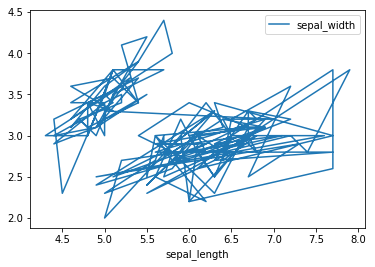

In [2]:
iris.plot(x='sepal_length', y='sepal_width')
plt.show()

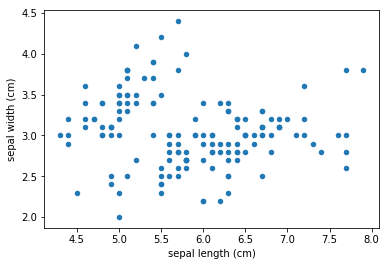

In [3]:
iris.plot(x='sepal_length', y='sepal_width', kind='scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

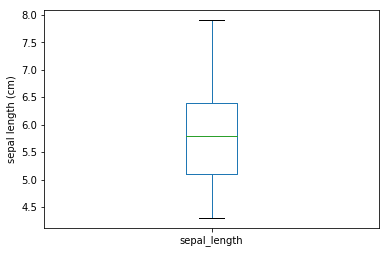

In [4]:
iris.plot(y='sepal_length', kind='box')
plt.ylabel('sepal length (cm)')
plt.show()

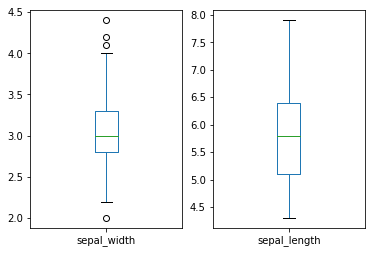

In [13]:
cols = ['sepal_width', 'sepal_length']
iris[cols].plot(kind='box', subplots=True)
plt.show()

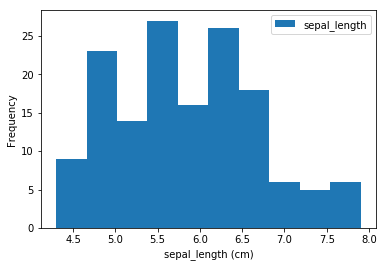

In [5]:
iris.plot(y='sepal_length', kind='hist')
plt.xlabel('sepal_length (cm)')
plt.show()

### Customizing histogram

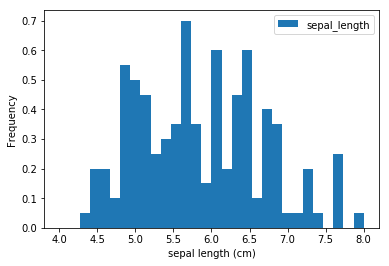

In [6]:
iris.plot(y='sepal_length', kind='hist', bins=30, range=(4,8), normed=True)
plt.xlabel('sepal length (cm)')
plt.show()

### Cumulative distribution

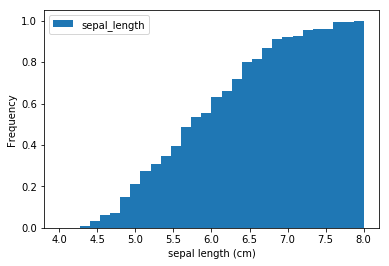

In [7]:
iris.plot(y='sepal_length', kind='hist', bins=30, range=(4,8), cumulative=True, normed=True)
plt.xlabel('sepal length (cm)')
plt.show()

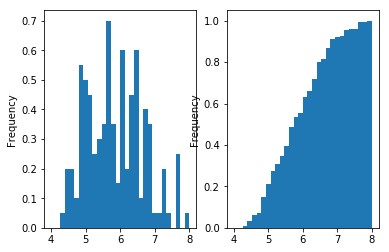

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)

iris['sepal_length'].plot(ax=axes[0], kind='hist', bins=30, range=(4,8), normed=True)
iris['sepal_length'].plot(ax=axes[1], kind='hist', bins=30, range=(4,8), normed=True, cumulative=True)
plt.show()

### Word of warning 
- Three different DataFrame plot idioms :
 - iris.plot(kind='hist')
 - iris.plt.hist()
 - iris.hist()      **this one is different from the other two**  
- Syntax/results differ!

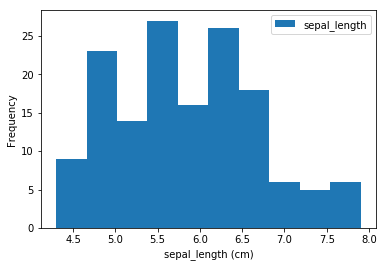

In [9]:
iris.plot.hist(y='sepal_length')
plt.xlabel('sepal_length (cm)')
plt.show()

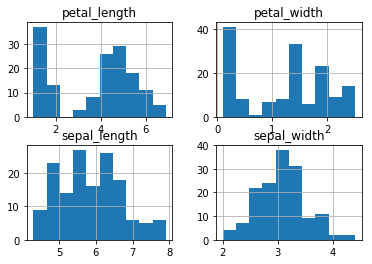

In [10]:
iris.hist()
plt.show()

## Statistical exploratory data analysis

### Summarizing with describe()
- All Series & DataFrame statistical methods **ignore null entries**.

In [17]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
print(iris['sepal_length'].count()) # Applied to Series
print()
print(iris[['sepal_length', 'sepal_width']].count()) # Applied to Series
print()
print(type(iris[['sepal_length', 'sepal_width']].count()))  # return series

150

sepal_length    150
sepal_width     150
dtype: int64

<class 'pandas.core.series.Series'>


In [37]:
print(iris['sepal_length'].mean()) # Applied to Series
print()
print(iris.mean()) # Applied to entire DataFrame
print()
print(iris.mean(axis='columns'))  # This computes the mean across all columns per row.
print()
print(type(iris.mean()))  # return series


5.84333333333

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
5      2.850
6      2.425
7      2.525
8      2.225
9      2.400
10     2.700
11     2.500
12     2.325
13     2.125
14     2.800
15     3.000
16     2.750
17     2.575
18     2.875
19     2.675
20     2.675
21     2.675
22     2.350
23     2.650
24     2.575
25     2.450
26     2.600
27     2.600
28     2.550
29     2.425
       ...  
120    4.525
121    3.825
122    4.800
123    3.925
124    4.450
125    4.550
126    3.900
127    3.950
128    4.225
129    4.400
130    4.550
131    5.025
132    4.250
133    3.925
134    3.925
135    4.775
136    4.425
137    4.200
138    3.900
139    4.375
140    4.450
141    4.350
142    3.875
143    4.550
144    4.550
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

<class 'pandas.core.series.Series'>


In [26]:
print(iris.std())
print()
print(iris.median())

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64


### Median & 0.5 quantiles

In [29]:
print(iris.median())
print()
q = 0.5
print(iris.quantile(q))

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64


### Inter-quartile range(IQR)
- half the data collected lies in this range (0.25-0.75)

In [30]:
q = [0.25, 0.75]
iris.quantile(q)

,sepal_length,sepal_width,petal_length,petal_width
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


In [32]:
print(iris.min())
print()
print(iris.max())

sepal_length       4.3
sepal_width          2
petal_length         1
petal_width        0.1
species         setosa
dtype: object

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object


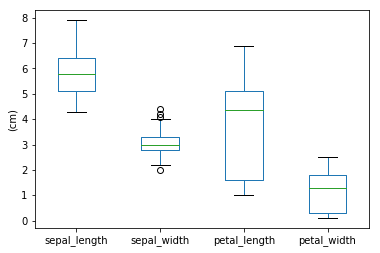

In [33]:
iris.plot(kind='box')
plt.ylabel('(cm)')
plt.show()

## Seperating populations with Boolean indexing

### Describe species column

In [38]:
iris['species'].describe()

count            150
unique             3
top       versicolor
freq              50
Name: species, dtype: object

In [39]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Filtering by species

In [64]:
indices = iris['species'] == 'setosa'
print(indices.head())
setosa = iris.loc[indices, :] # extract new DataFrame

indices = iris['species'] == 'versicolor'
versicolor = iris.loc[indices, :] # extract new DataFrame
 
virginica = iris[iris['species'] == 'virginica']    # another method

0    True
1    True
2    True
3    True
4    True
Name: species, dtype: bool


### Checking species

In [65]:
setosa['species'].unique()

array(['setosa'], dtype=object)

In [66]:
versicolor['species'].unique()

array(['versicolor'], dtype=object)

In [67]:
virginica['species'].unique()

array(['virginica'], dtype=object)

In [68]:
del setosa['species'], versicolor['species'], virginica['species']

In [69]:
print(setosa.head(2))
print()
print(versicolor.head(2))
print()
print(virginica.head(2))

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2

    sepal_length  sepal_width  petal_length  petal_width
50           7.0          3.2           4.7          1.4
51           6.4          3.2           4.5          1.5

     sepal_length  sepal_width  petal_length  petal_width
100           6.3          3.3           6.0          2.5
101           5.8          2.7           5.1          1.9


### Visual EDA: all data

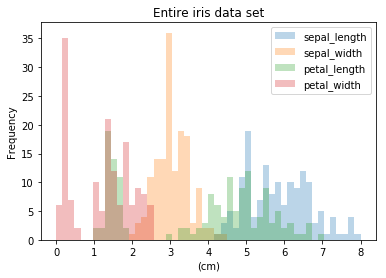

In [70]:
iris.plot(kind='hist', bins=50, range=(0, 8), alpha=0.3)
plt.title('Entire iris data set')
plt.xlabel('(cm)')
plt.show()

### Visual EDA: indivisual factors

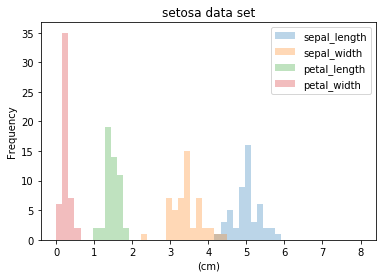

In [71]:
setosa.plot(kind='hist', bins=50, range=(0, 8), alpha=0.3)
plt.title('setosa data set')
plt.xlabel('(cm)')
plt.show()

### Statistical EDA: describe()

In [72]:
describe_all = iris.describe()
describe_setosa = setosa.describe()
describe_versicolor = versicolor.describe()
describe_virginica = virginica.describe()

print(describe_setosa)

       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000


### Computing errors

In [73]:
import numpy as np

error_setosa = 100 * np.abs(describe_setosa - describe_all)
error_setosa = error_setosa / describe_setosa 
print(error_setosa)

       sepal_length  sepal_width  petal_length  petal_width
count    200.000000   200.000000    200.000000   200.000000
mean      16.726595    10.649503    156.739526   391.256831
std      134.919250    13.796994    916.891608   611.840574
min        0.000000    13.043478      0.000000     0.000000
25%        6.250000    10.400000     14.285714    50.000000
50%       16.000000    11.764706    190.000000   550.000000
75%       23.076923    10.204082    223.809524   500.000000
max       36.206897     0.000000    263.157895   316.666667
